# Airbnb Analysis - Initial EDA & Data Preprocessing

This project looks at Airbnb Listing and Review data in Seattle to find meaningful insights that might help new owners to start their business on Airbnb

This analysis seeks the answer for 3 questions:
1. What features relate to higher ratings?
2. How to be a superhost? 
3. Where my resources should go in different months of a year?

## About this document
This document is used to prepare data for more detailed EDA and modeling


# Description of Data
The data is sourced from https://www.kaggle.com/airbnb/seattle/data which hosts publicly available data from the Airbnb site. Data was scraped on 1/4/2016 and contained data from 1/4/2016 to 1/2/2017.

The dataset comprises of three main tables:

**listings** - Detailed listings data showing 92 atttributes for each of the listings. Some of the attributes used in the analysis are price (continuous), longitude (continuous), latitude (continuous), listing_type (categorical), is_superhost (categorical), neighbourhood (categorical), ratings (continuous) among others.

**reviews** - Detailed reviews given by the guests with 6 attributes. Key attributes include date (datetime), listing_id (discrete), reviewer_id (discrete) and comment (textual). However, we will not use this data set int he scope of this analysis

**calendar** - Provides details about booking for the next year by listing. Four attributes in total including listing_id (discrete), date (datetime), available (categorical) and price (continuous).



# Summary of Data Preprocessing 

1. price (listings, calendar): The price column contained data in string format with the currency symbol ‘$’ attached to it. This column was manipulated to contain integer values for analysis.

2. date (calendar, listings, reviews): The date was contained in mm-dd-yyyy string format. It was transformed into datetime format obtain weekly and monthly insights.

3. Recoding Categorical variables:
    - host_response_time: 'within an hour' = 1,'within a few hours' = 2 ,'within a day' = 3 , 'a few days or more = 4

    - cancellation_policy: 'flexible' =1, 'moderate'= 2,'strict'= 3
  
    - neighborhood_type: 'High price' = mean price >100, 'Low price' = mean price <100

    - property_type: house, apartment, other
    - bed_type: 'real bed' vs 'Other'


# Summary of Initial Exploratory Analysis:
## 'calendar.csv' data
- There is a price increase in summer months (June, July, August)
- The number of days that the rentals are unavailable is higher in summer months, and at the beginning of the year. Maybe this explains for why price is higher in the summer (low supply and high demand)
- An interesting thing is if the property is available for rent >60days/year, it might be illigal (as the property is converted for tourist stay purpose). I want to explore this aspect further. I found that there are way more listings that hve 60 days available, which suggest many owner are using Airbnb as professional renting place and not just "rent an extra room" like Airbnb initially is intended to be.

## 'listings.csv' data
- Magnolia is the most expensive neighborhood while Delridge is the cheapist neighborhood to rent on Airbnb
- More EDA results will be in the EDA & Modeling file



# Table of Content
1. [Initial data exploration](#heading1)
2. [Prepare data](#heading2)
(Validate data, treat missing values, feature engineer, create dummy variables for modeling)
    1. [Calendar Data set](#heading2.1)
    2. [Listing Data set](#heading2.2)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display

In [6]:
listings = pd.read_csv('./seattle/listings.csv')
calendar = pd.read_csv('./seattle/calendar.csv')
reviews = pd.read_csv('./seattle/reviews.csv')

## Explore Data <a name="heading1"></a>

In [7]:
display(listings.shape)
display(calendar.shape)
display(reviews.shape)

(3818, 92)

(1393570, 4)

(84849, 6)

In [8]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [9]:
calendar.sample(5)

,listing_id,date,available,price
1134931,6782993,2016-05-29,t,$53.00
1158182,945833,2016-02-10,f,NaN
162835,3915826,2016-02-18,f,NaN
1043015,5510720,2016-08-01,f,NaN
900258,7274556,2016-06-20,t,$65.00


In [10]:
reviews.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
55827,7256122,47426894,2015-09-18,27733971,Jon,I had to add one day which made a turn around ...
11331,234898,1016364,2012-03-19,1581651,Karen,This is a wonderful little apartment with all ...
55753,139463,22031045,2014-10-28,578249,Larry And Susan,We enjoyed our stay. The place was exactly as...
78481,975179,56314360,2015-12-12,29628302,Nathalie,The listing was exactly as described. The hous...
73530,58503,34852570,2015-06-13,29795996,Ben,Visala is an amazing host and her home is loca...


## Prepare Data <a name="heading2"></a>

In [11]:
# Function: Convert object to date
def to_date(df, col):
    '''
    Input: 
        df: dataframe
        col: column in string format (object) you want to convert into date
    Output:
        df: dataframe with updated column in date format. Every other columns are kept intact
    '''
    df[col] = pd.to_datetime(df[col])
    return df

# Function: Convert price object ('$12.00') to numeric value
def price_to_numeric(df, col):
    '''
    Input: 
        df: dataframe
        col: currency column in string format (object) you want to convert into numeric
    Output:
        df: dataframe with updated column in float format. Every other columns are kept intact
    '''
    df[col] = df[col].str.replace('$','')
    df[col] = df[col].str.replace(',','')
    df[col] = df[col].astype('float')
    return df


# Function: Convert percentage ('100%') to numeric value
def perc_to_numeric(df, col):
    '''
    Input: 
        df: dataframe
        col: percentage column in string format (object) you want to convert into numeric
    Output:
        df: dataframe with updated column in float format. Every other columns are kept intact
    '''
    df[col] = df[col].str.replace('%','')
    df[col] = df[col].astype('float')
    return df

### Calendar data <a name="heading2.1"></a>


#### Data Type <a name="heading2.1.1"></a>

In [12]:
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [13]:
calendar_df = price_to_numeric(calendar,'price')
calendar_df = to_date(calendar, 'date')

calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [14]:
calendar_df.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

#### Missing data <a name="heading2.1.2"></a>

This data set has 30% missing values in price column in days that the listings are not available. This might be due to owners not having the place available, so the price is not listed.

An interesting thing is if the property is available for rent >60days/year, it might be illigal (as the property is converted for tourist stay purpose). I want to explore this aspect further. 

In [15]:
calendar_df.isnull().sum()/calendar.shape[0]

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

#### Data Exploration <a name="heading2.1.3"></a>

In [16]:
print('date ranged from {} to {}'. format(calendar_df.date.min(), calendar_df.date.max()))

date ranged from 2016-01-04 00:00:00 to 2017-01-02 00:00:00


##### Price Trend <a name="heading2.1.4"></a>
We observe increase increase in summer months, as well as posible weekly effect on price (shown by spikes across the line)

Text(0.5, 1.0, 'Temporal effect on Price')

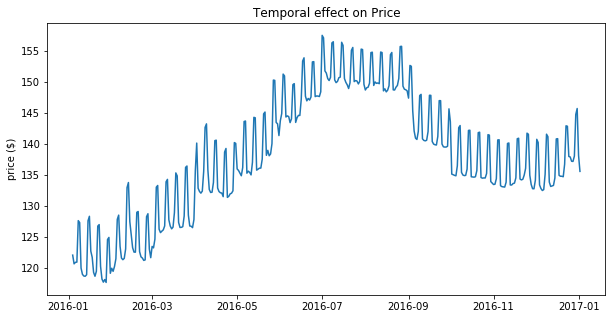

In [17]:
# Chart with avaible dates only, explore temporal effect on price 
chart_data = calendar_df.dropna()
chart_data = chart_data.groupby('date')['price'].mean().reset_index()

# Graph
plt.figure(figsize=(10,5) )
plt.plot(chart_data['date'],chart_data['price'])
plt.ylabel('price ($)')
plt.title('Temporal effect on Price')

##### Unavailable listing trend

Text(0.5, 1.0, 'Trend of Unvailable listings across time in 2016')

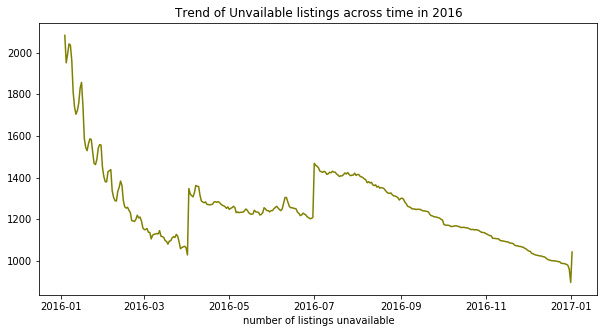

In [18]:
chart_data = calendar_df.copy()

plt.figure(figsize=(10,5) )
test = calendar_df.groupby(['date','available']).count()['listing_id'].reset_index()
test_2 = test.pivot(index='date', columns='available', values='listing_id').reset_index()
plt.plot(test_2['date'], test_2['f'], color='olive')
plt.xlabel('number of listings unavailable')
plt.title('Trend of Unvailable listings across time in 2016')

##### Unavailable days per Listings per Year count
There are way more listings that hve 60 days available, which suggest many owner are using Airbnb as professional renting place and not just "rent an extra room" like Airbnb initially is intended to be.

In [19]:
chart_data = calendar_df.copy()

# count number of days room available
avail_days = chart_data[chart_data['available']=='t'].groupby(['listing_id']).count()['date']\
    .reset_index()
# Categorize if a listing has more than 60 days available in a year
avail_days['days in a year'] = avail_days['date']\
    .apply(lambda col: 'more than 60 days' if col >=60 else 'less than 60 days')

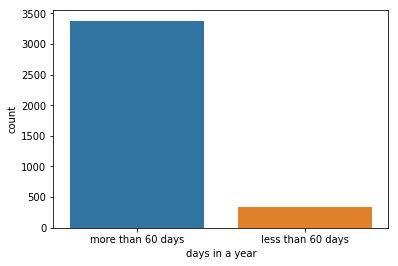

In [20]:
sns.countplot(x="days in a year", data=avail_days)

#### Make non-na df

In [21]:
calendar_df_nonull = calendar_df.dropna()

In [22]:
calendar_df_nonull.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [23]:
calendar_df_nonull.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

### Listings Data <a name="heading2.2"></a>

Output of this section:

- listing_df: Does not contain dummy variables

- listing_df_dummy: contains dummy variables to get ready for modeling

- listings_price_df: contain dummy + exclude response time, response rate

Drop columns that we do not need. We are left with 28 variables

In [24]:
cols_to_drop = ['listing_url','scrape_id','last_scraped', 'experiences_offered', 'thumbnail_url',\
                'medium_url','picture_url','xl_picture_url', 'host_url', 'host_name',\
               'host_location','host_about','host_thumbnail_url','host_picture_url', 'host_listings_count',\
               'host_verifications',  'street','host_neighbourhood', 'neighbourhood','neighbourhood_cleansed',\
               'state','country_code','country','is_location_exact','requires_license','license', \
                'market','smart_location','city','host_has_profile_pic','host_identity_verified',\
               'name','summary','space','description','neighborhood_overview','notes','transit',\
               'amenities','square_feet', 'review_scores_accuracy',\
                'review_scores_cleanliness','first_review','last_review','calendar_last_scraped',\
                'review_scores_checkin','review_scores_communication','review_scores_location',\
                'review_scores_value','weekly_price','monthly_price','security_deposit','cleaning_fee','calendar_updated',\
               'jurisdiction_names','require_guest_profile_picture','require_guest_phone_verification',\
                'calculated_host_listings_count', 'host_acceptance_rate','zipcode','instant_bookable', 'minimum_nights',\
               'maximum_nights','has_availability']
listings_df = listings.drop(columns = cols_to_drop)
listings_df.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,...,guests_included,extra_people,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
0,241032,956883,2011-08-11,within a few hours,96%,f,3.0,Queen Anne,47.636289,-122.371025,...,2,$5.00,14,41,71,346,207,95.0,moderate,4.07
1,953595,5177328,2013-02-21,within an hour,98%,t,6.0,Queen Anne,47.639123,-122.365666,...,1,$0.00,13,13,16,291,43,96.0,strict,1.48
2,3308979,16708587,2014-06-12,within a few hours,67%,f,2.0,Queen Anne,47.629724,-122.369483,...,10,$25.00,1,6,17,220,20,97.0,strict,1.15
3,7421966,9851441,2013-11-06,NaN,NaN,f,1.0,Queen Anne,47.638473,-122.369279,...,1,$0.00,0,0,0,143,0,NaN,flexible,NaN
4,278830,1452570,2011-11-29,within an hour,100%,f,2.0,Queen Anne,47.632918,-122.372471,...,6,$15.00,30,60,90,365,38,92.0,strict,0.89


In [25]:
#Rename column
listings_df = listings_df.rename(columns={'neighbourhood_group_cleansed':'neighborhood'})

In [26]:
listings_df.shape

(3818, 28)

In [27]:
listings_df.isnull().sum()

id                             0
host_id                        0
host_since                     2
host_response_time           523
host_response_rate           523
host_is_superhost              2
host_total_listings_count      2
neighborhood                   0
latitude                       0
longitude                      0
property_type                  1
room_type                      0
accommodates                   0
bathrooms                     16
bedrooms                       6
beds                           1
bed_type                       0
price                          0
guests_included                0
extra_people                   0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
review_scores_rating         647
cancellation_policy            0
reviews_per_month            627
dtype: int64

In [28]:
listings_df.describe()

,id,host_id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,reviews_per_month
count,3.818000e+03,3.818000e+03,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3191.000000
mean,5.550111e+06,1.578556e+07,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,1.672603,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,2.078919
std,2.962660e+06,1.458382e+07,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,1.311040,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,1.822348
min,3.335000e+03,4.193000e+03,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.020000
25%,3.258256e+06,3.275204e+06,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,0.695000
50%,6.118244e+06,1.055814e+07,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,1.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,1.540000
75%,8.035127e+06,2.590309e+07,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,2.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,3.000000
max,1.034016e+07,5.320861e+07,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,15.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,12.150000


#### Clean Data type

In [29]:
# Edit data type of these 4 columns
listings_df = to_date(listings_df, 'host_since')
listings_df = perc_to_numeric(listings_df, 'host_response_rate')
listings_df = price_to_numeric(listings_df, 'price')
listings_df = price_to_numeric(listings_df, 'extra_people')

#### Missing data

Missing reviews per months are in listing ID that did not receive any review. I will impute 0 for reviews_per_month

In [30]:
listings_df['reviews_per_month'].fillna(0, inplace = True)
listings_df['reviews_per_month'].head()

0    4.07
1    1.48
2    1.15
3    0.00
4    0.89
Name: reviews_per_month, dtype: float64

Similarly, missing reviews score are in listing ID that did not receive any review. I will impute 0 for review_scores_rating

In [31]:
listings_df['review_scores_rating'].fillna(0, inplace = True)
listings_df['review_scores_rating'].head()

0    95.0
1    96.0
2    97.0
3     0.0
4    92.0
Name: review_scores_rating, dtype: float64

#### Categorical Variable Treatment

Summary:
- Host_since: translate into days_hosted
- Host response time: translate into numeric value (1-2-3-4)
- Cancellation policy:  translate into numeric value (1-2-3)
- Variables that are made into Dummy variables: property type, room type, neighborhood

Output of this section: 

listing_df: Does not contain dummy variables

listing_df_dummy: contains dummy variables to get ready for modeling

***Days Hosted*** from host_since, calculate how many days that host has been renting their property

In [32]:
listings_df['days_hosted'] = (pd.to_datetime('2016-01-04') - listings_df['host_since']).astype('timedelta64[D]')
listings_df.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,neighborhood,latitude,longitude,...,extra_people,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,days_hosted
0,241032,956883,2011-08-11,within a few hours,96.0,f,3.0,Queen Anne,47.636289,-122.371025,...,5.0,14,41,71,346,207,95.0,moderate,4.07,1607.0
1,953595,5177328,2013-02-21,within an hour,98.0,t,6.0,Queen Anne,47.639123,-122.365666,...,0.0,13,13,16,291,43,96.0,strict,1.48,1047.0
2,3308979,16708587,2014-06-12,within a few hours,67.0,f,2.0,Queen Anne,47.629724,-122.369483,...,25.0,1,6,17,220,20,97.0,strict,1.15,571.0
3,7421966,9851441,2013-11-06,NaN,NaN,f,1.0,Queen Anne,47.638473,-122.369279,...,0.0,0,0,0,143,0,0.0,flexible,0.00,789.0
4,278830,1452570,2011-11-29,within an hour,100.0,f,2.0,Queen Anne,47.632918,-122.372471,...,15.0,30,60,90,365,38,92.0,strict,0.89,1497.0


In [33]:
# Drop original host_since
listings_df.drop(columns = ['host_since'], inplace = True)

***Host_response_time*** Convert this variable into numeric value

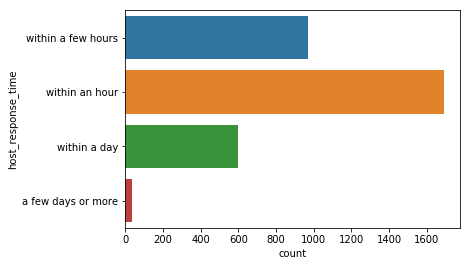

In [34]:
sns.countplot(y='host_response_time', data =  listings_df)

In [35]:
listings_df['host_response_time'].head()

0    within a few hours
1        within an hour
2    within a few hours
3                   NaN
4        within an hour
Name: host_response_time, dtype: object

In [36]:
listings_df['host_response_time']\
    .replace(['within an hour','within a few hours','within a day', 'a few days or more'],\
                (1, 2, 3, 4), \
                inplace = True)
listings_df['host_response_time'].head()

0    2.0
1    1.0
2    2.0
3    NaN
4    1.0
Name: host_response_time, dtype: float64

***Cancellation policy:*** Convert this variable into numeric value

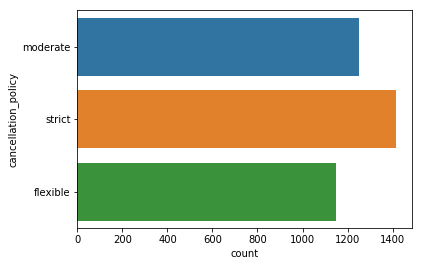

In [37]:
sns.countplot(y='cancellation_policy', data =  listings_df)

In [38]:
listings_df['cancellation_policy'].head()

0    moderate
1      strict
2      strict
3    flexible
4      strict
Name: cancellation_policy, dtype: object

In [39]:
listings_df['cancellation_policy']\
    .replace(['flexible','moderate','strict'],\
                (1, 2, 3), \
                inplace = True)
listings_df['cancellation_policy'].head()

0    2
1    3
2    3
3    1
4    3
Name: cancellation_policy, dtype: int64

***Make dummy variable: neighborhood, proterty type, room type***

In [40]:
# Function that make dummy + add to the original df
def make_dummy(df, col):
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis = 1)
    df = df.drop(columns = col, axis = 1) #drop original column
    return df

***Neighborhood:***

Make dummies variable for this feature after dividing neighborhoods into high-priced and low-priced neighborhood (new variable: neighborhood_type)

*Observation*: There are too many neighborhoods that might make each group contains too few observations for prediction. Therefore, I will group into 2 neighborhood groups
- neighborhood price high: average rental price >=$100

- neighborhood price low: average rental price <$100

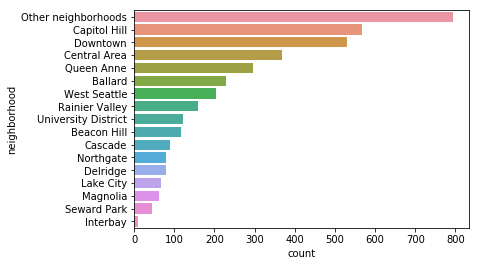

In [41]:
# Count listings in each neighbor
sns.countplot(y='neighborhood', data =  listings_df,\
              order=listings_df['neighborhood'].value_counts().index)

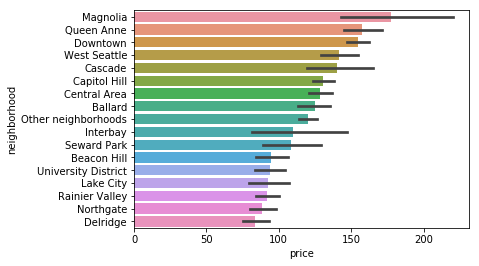

In [42]:
sns.barplot(y = 'neighborhood', x = 'price', data =  listings_df, 
            order=listings_df.groupby('neighborhood')['price'].mean().sort_values(ascending=False).index)


In [43]:
# Make lowhigh_cat df that contains information about neighborhood type based on average price 
lowhigh_cat = (listings_df.groupby('neighborhood')['price'].mean() >=100).reset_index()

lowhigh_cat.rename(columns = {'price': 'neighborhood_type'}, inplace = True)

# change label
lowhigh_cat['neighborhood_type'] = lowhigh_cat['neighborhood_type']\
    .apply(lambda var: 'high price' if var == True else 'low price')

In [44]:
listings_df = listings_df.merge(lowhigh_cat, how = 'left', on  ='neighborhood')

***Bed type:***

Make dummies variable for this feature after dividing bed type into Real bed and Other

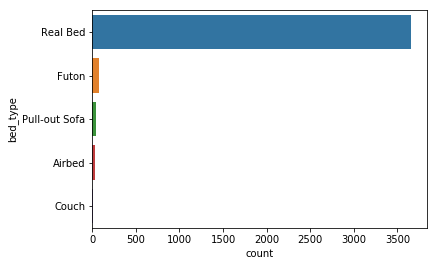

In [45]:
# Count listings in each bed type
sns.countplot(y='bed_type', data =  listings_df,\
              order=listings_df['bed_type'].value_counts().index)

In [46]:
listings_df['bed_type'] = listings_df['bed_type']\
    .apply(lambda col: "Real Bed" if col == 'Real Bed' else "Other")

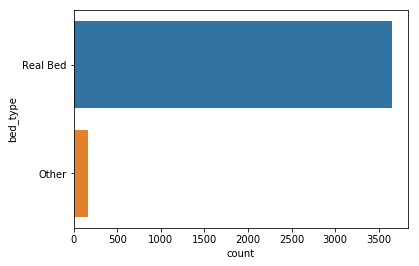

In [47]:
# Count listings in each bed type
sns.countplot(y='bed_type', data =  listings_df,\
              order=listings_df['bed_type'].value_counts().index)

***Room_type*** make dummy variable

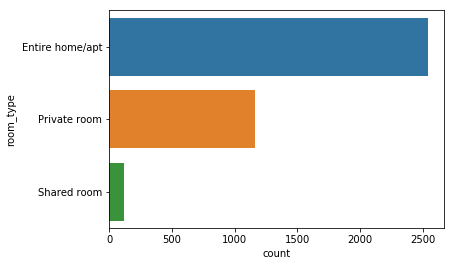

In [48]:
sns.countplot(y='room_type', data =  listings_df,\
              order=listings_df['room_type'].value_counts().index)

***Property_type:*** 
There are so many types of property that if we make dummies for them all, we will have the dimension problem. Therefore, I will groups property that are not House and Apartment into one Other group

Then, we will make dummy variable out of Proterty type

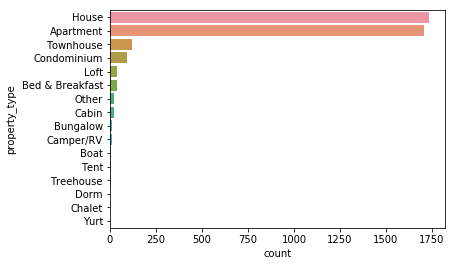

In [49]:
sns.countplot(y='property_type', data =  listings_df,\
              order=listings_df['property_type'].value_counts().index)

In [50]:
listings_df['property_type'] = listings_df['property_type']\
    .apply(lambda col: "House" if col == 'House' else ("Apartment" if col =="Apartment" else "Other"))

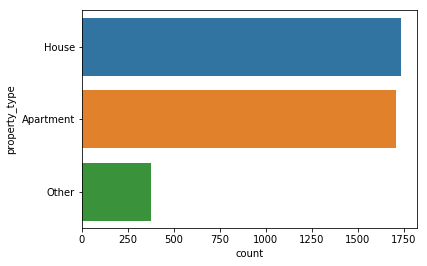

In [51]:
sns.countplot(y='property_type', data =  listings_df,\
              order=listings_df['property_type'].value_counts().index)

***Make of Dummy Columns***

Make dummy columns out of 'neighborhood_type', 'bed_type', 'property_type', 'room_type', 'host_is_superhost'

In [52]:
# Make dummy variable
listings_df_dummy = make_dummy(listings_df, ['neighborhood_type', 'bed_type', 'property_type',\
                                             'room_type', 'host_is_superhost'])
listings_df_dummy = listings_df_dummy.drop(columns = ['neighborhood'], axis = 1)

In [53]:
# Make list of columns we made dummy out of them to keep track for modeling
listings_df_dummy.head()

,id,host_id,host_response_time,host_response_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,bed_type_Other,bed_type_Real Bed,property_type_Apartment,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,host_is_superhost_f,host_is_superhost_t
0,241032,956883,2.0,96.0,3.0,47.636289,-122.371025,4,1.0,1.0,...,0,1,1,0,0,1,0,0,1,0
1,953595,5177328,1.0,98.0,6.0,47.639123,-122.365666,4,1.0,1.0,...,0,1,1,0,0,1,0,0,0,1
2,3308979,16708587,2.0,67.0,2.0,47.629724,-122.369483,11,4.5,5.0,...,0,1,0,1,0,1,0,0,1,0
3,7421966,9851441,NaN,NaN,1.0,47.638473,-122.369279,3,1.0,0.0,...,0,1,1,0,0,1,0,0,1,0
4,278830,1452570,1.0,100.0,2.0,47.632918,-122.372471,6,2.0,3.0,...,0,1,0,1,0,1,0,0,1,0


### Make final data sets

#### Separate listings_df into 2 df (listings_price and listings_review) for modeling

I can't find any pattern that explains for missing values in host_response_time and host_response_rate. At first, I suspected that these host did not have having customers, therefore, there is no contact that require responses. However, many of them did hosted people and have reviews.

I decided to separate this listings df into 2 df. One is to answer questions about host behaviors-ratings, one is to answer the question about pricing of a rental. By doing this, we do not lose a lot data to find answers for the Price question, because host response behavior might explain less about a rental's price than the rental's location and features.

In [54]:
listings_df.columns

Index(['id', 'host_id', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_total_listings_count', 'neighborhood',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'guests_included',
       'extra_people', 'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'cancellation_policy', 'reviews_per_month', 'days_hosted',
       'neighborhood_type'],
      dtype='object')

In [55]:
listings_df_dummy.columns

Index(['id', 'host_id', 'host_response_time', 'host_response_rate',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included',
       'extra_people', 'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'cancellation_policy', 'reviews_per_month', 'days_hosted',
       'neighborhood_type_high price', 'neighborhood_type_low price',
       'bed_type_Other', 'bed_type_Real Bed', 'property_type_Apartment',
       'property_type_House', 'property_type_Other',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'host_is_superhost_f', 'host_is_superhost_t'],
      dtype='object')

In [56]:
# To best model for Price, we drop 'host_response_time' and 'host_response_rate' columns
listings_df_price = listings_df_dummy[['id', 'host_id', 
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included',
       'extra_people', 'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'cancellation_policy', 'reviews_per_month', 'days_hosted',
       'neighborhood_type_high price', 'neighborhood_type_low price',
       'bed_type_Other', 'bed_type_Real Bed', 'property_type_Apartment',
       'property_type_House', 'property_type_Other',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'host_is_superhost_f', 'host_is_superhost_t']]

In [57]:
listings_df_price.head(1)

,id,host_id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,bed_type_Other,bed_type_Real Bed,property_type_Apartment,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,host_is_superhost_f,host_is_superhost_t
0,241032,956883,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,85.0,...,0,1,1,0,0,1,0,0,1,0


#### Make combined data frame: listing + calendar

Input:
- calendar_df_nonull
- listings_df_price

Output: 
- joined_calendar_listings

In [58]:
print('calendar_df_nonull has {} rows and {} columns'.format(calendar_df_nonull.shape[0], calendar_df_nonull.shape[1]))

print('listings_df_price df has {} rows and {} columns'.format(listings_df_price.shape[0], listings_df_price.shape[1]))

calendar_df_nonull has 934542 rows and 4 columns
listings_df_price df has 3818 rows and 33 columns


In [59]:
joined_calendar_listings_dummy = calendar_df_nonull.merge(listings_df_price, how = 'left',\
                                                    left_on = 'listing_id', right_on = 'id')

In [60]:
joined_calendar_listings_dummy.shape

(934542, 37)

In [61]:
joined_calendar_listings_dummy.rename(columns={'price_x':'price_calendar'}, inplace = True)

In [62]:
joined_calendar_listings_dummy.head(5)

,listing_id,date,available,price_calendar,id,host_id,host_total_listings_count,latitude,longitude,accommodates,...,bed_type_Other,bed_type_Real Bed,property_type_Apartment,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,host_is_superhost_f,host_is_superhost_t
0,241032,2016-01-04,t,85.0,241032,956883,3.0,47.636289,-122.371025,4,...,0,1,1,0,0,1,0,0,1,0
1,241032,2016-01-05,t,85.0,241032,956883,3.0,47.636289,-122.371025,4,...,0,1,1,0,0,1,0,0,1,0
2,241032,2016-01-13,t,85.0,241032,956883,3.0,47.636289,-122.371025,4,...,0,1,1,0,0,1,0,0,1,0
3,241032,2016-01-14,t,85.0,241032,956883,3.0,47.636289,-122.371025,4,...,0,1,1,0,0,1,0,0,1,0
4,241032,2016-01-18,t,85.0,241032,956883,3.0,47.636289,-122.371025,4,...,0,1,1,0,0,1,0,0,1,0


#### Similar to above, but join listings_df (no dummy) and calendar df

Just so I can visualize data in EDA file

In [63]:
joined_calendar_listings = calendar_df_nonull.merge(listings_df, how = 'left',\
                                                    left_on = 'listing_id', right_on = 'id')

joined_calendar_listings.rename(columns={'price_x':'price_calendar'}, inplace = True)

In [64]:
joined_calendar_listings.head(5)

,listing_id,date,available,price_calendar,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,days_hosted,neighborhood_type
0,241032,2016-01-04,t,85.0,241032,956883,2.0,96.0,f,3.0,...,14,41,71,346,207,95.0,2,4.07,1607.0,high price
1,241032,2016-01-05,t,85.0,241032,956883,2.0,96.0,f,3.0,...,14,41,71,346,207,95.0,2,4.07,1607.0,high price
2,241032,2016-01-13,t,85.0,241032,956883,2.0,96.0,f,3.0,...,14,41,71,346,207,95.0,2,4.07,1607.0,high price
3,241032,2016-01-14,t,85.0,241032,956883,2.0,96.0,f,3.0,...,14,41,71,346,207,95.0,2,4.07,1607.0,high price
4,241032,2016-01-18,t,85.0,241032,956883,2.0,96.0,f,3.0,...,14,41,71,346,207,95.0,2,4.07,1607.0,high price


## Remove null + drop some columns

In [65]:
listings_df.dropna(how = 'any', axis = 0, inplace = True)
#listings_df.drop(columns = ['host_id', 'longitude', 'latitude'], axis = 1, inplace = True)

listings_df_dummy.dropna(how = 'any', axis = 0, inplace = True)
#listings_df_dummy.drop(columns = ['id', 'host_id', 'longitude', 'latitude'], axis = 1, inplace = True)

listings_df_price.dropna(how = 'any', axis = 0, inplace = True)
#listings_df_price.drop(columns = ['id', 'host_id', 'longitude', 'latitude'], axis = 1, inplace = True)

joined_calendar_listings.dropna(how = 'any', axis = 0, inplace = True)
#joined_calendar_listings.drop(columns = ['id', 'host_id', 'longitude', 'latitude'], axis = 1, inplace = True)

joined_calendar_listings_dummy.dropna(how = 'any', axis = 0, inplace = True)
#joined_calendar_listings_dummy.drop(columns = ['id', 'host_id', 'longitude', 'latitude'], axis = 1, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


## Export

In [66]:
listings_df.to_csv('./treated_data/listings_df.csv')
listings_df_dummy.to_csv('./treated_data/listings_df_dummy.csv')
listings_df_price.to_csv('./treated_data/listings_df_price.csv')
joined_calendar_listings.to_csv('./treated_data/joined_calendar_listings.csv')
joined_calendar_listings_dummy.to_csv('./treated_data/joined_calendar_listings_dummy.csv')